# Using Markdown and Python in Jupyter notebooks
*CS-E5885 Modeling Biological Networks* <br>
*Spring 2021*
*Juho Timonen* <br>


---

A notebook consists of markdown cells and code cells. You can

* select a cell by clicking it once
* see and edit the source code of a cell by double clicking it
* run the selected cell with `shift + Enter`
* click *Help > Keyboard shortcuts* for more helpful commands
* find more detailed Jupyter notebook tutorials [here](https://jupyter-notebook.readthedocs.io/en/stable/index.html) or by searching the internet

If you submit your solution as a Jupyter notebook, always **remember to Kernel > Restart & Run all** and check that the output looks as desired before submitting.

---

## 1. Markdown
The Jupyter notebook has extensive markup capabilities. Here we show some examples. You can use markdown cells to write a complete answer with text and equations. They support Latex syntax for equations inside dollar signs, as in `$a = \sqrt{2}$`.

\begin{equation}
a = \sqrt{2}
\end{equation}

You can go ahead and double click cells below to see their Markdown code.

### 1.2 Matrices

Matrices can be written like here:

$$
\begin{align*}
M &= \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
&
M^T &= \begin{bmatrix}
a & c \\
b & d
\end{bmatrix}
\end{align*}
$$



### 1.3 Tables

Example table:

| Species | Number of Molecules |
| :---: | :---: |
| A | 50 |
| B | 100 |


### 1.4 Showing intermediate steps
In some exercises you may need to do longer calculations, and should show intermediate steps in your solution. You use `\begin{align*}` like in this example.

**Problem:** Let $X,Y$ be two independent random variables so that $X \sim \text{Exponential}(\lambda_1)$ and $Y \sim \text{Exponential}(\lambda_2)$. Derive the distribution of $Z = \min\{X,Y\}$.

**Solution:**
We know the cumulative density functions of $X$ and $Y$, which are

$$
F_X(x) = 1 - e^{-\lambda_1 x} \hspace{1cm} \text{and} \hspace{1cm} F_Y(y) = 1 - e^{-\lambda_2 y} 
$$

and can compute the cumulative density function of $Z$ as

$$
\begin{align*}
F_Z(z) &= P(Z \leq z)\\ 
  &= 1 - P(Z \geq z) \\
  &= 1 - P(\min\{X,Y\} \geq z) \\
  &= 1 - P(X \geq z \text{ and } Y \geq z)\\
  &= 1 - P(X \geq z) \cdot P(Y \geq z)\\
  &= 1 - (1 - F_X(z)) \cdot (1 - F_Y(z))\\
  &= 1 - e^{-\lambda_1 z} \cdot e^{-\lambda_2 z} \\
  &= 1 - e^{-(\lambda_1 + \lambda_2) z}
\end{align*}
$$

which means that $Z \sim \text{Exponential}(\lambda_1 + \lambda_2)$.

## 2. Python programming <a name="sec2"></a>

We will first import some libraries that we commonly need.

In [1]:
# This is a code cell
import numpy as np
from matplotlib import pyplot as plt

### 2.1 Variables
You can declare variables and check their type like so:

In [2]:
a = 0.0 # float
b = [1.0, 2.0, -1.0] # list
c = np.array(b) # numpy array
d = "hello" # string
print(type(a))
print(type(b))
print(type(c))
print(type(d))

<class 'float'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'str'>


### 2.2 Numpy arrays

#### 2.2.1 Creating  numpy arrays

In [3]:
# creating a 2-dimensional array of floats
A = np.array([[1.3,2.1,3.3], [0.4, 0.2, 0.1]])
print(A)
print("shape =", A.shape)
print("dtype =", A.dtype)

[[1.3 2.1 3.3]
 [0.4 0.2 0.1]]
shape = (2, 3)
dtype = float64


In [4]:
# creating a 1-dimensional integer array
B = np.array([0,0,0,0])
print(B)
print("shape =", B.shape)
print("dtype =", B.dtype)

[0 0 0 0]
shape = (4,)
dtype = int64


#### 2.2.2 Reshaping

In [5]:
A_flat = A.ravel()
print(A_flat)
print("shape =", A_flat.shape)
print("length =", len(A_flat))

[1.3 2.1 3.3 0.4 0.2 0.1]
shape = (6,)
length = 6


#### 2.2.3 Accessing array elements

In [6]:
print(A_flat[0]) # first element of b_flat, array indices start from zero

1.3


In [7]:
a_row = A[0,] # first row of A
print(a_row)
print("shape =", a_row.shape)

[1.3 2.1 3.3]
shape = (3,)


#### 2.2.4 Editing array content

Note that in Python, as opposed to for example Matlab, **arrays are not copied** by default when using `=`. It only sets a reference to the original array.

In [8]:
A_new = A # A_new is a reference to A
print(A_new)

[[1.3 2.1 3.3]
 [0.4 0.2 0.1]]


In [9]:
A_new[0,0] = 0 # edit element of A_new
print(A) # original A has changed, too

[[0.  2.1 3.3]
 [0.4 0.2 0.1]]


In [10]:
print(A_flat) # in fact, also the flattened version changed because it was also just referencing

[0.  2.1 3.3 0.4 0.2 0.1]


In [11]:
# if we copy using np.copy() and edit it, original doesn't change
A_copy = np.copy(A)
A_copy[1,2] = 100
print(A_copy) # has now 100 in it

[[  0.    2.1   3.3]
 [  0.4   0.2 100. ]]


In [12]:
print(A) # hasn't changed

[[0.  2.1 3.3]
 [0.4 0.2 0.1]]


### 2.3 Matrix and vector arithmetic

In some exercise problems it may need to do matrix computations on a computer. You can use numpy arrays to represent mathematical matrices and vectors.

In [13]:
M = A[:, 0:2] # take first two columns of A
print(M) # M is a 2 x 2 matrix

[[0.  2.1]
 [0.4 0.2]]


In [14]:
print(M*M) # elementwise multiplication

[[0.   4.41]
 [0.16 0.04]]


In [15]:
print(np.matmul(M,M)) # matrix multiplication, can also be done with @ 

[[0.84 0.42]
 [0.08 0.88]]


In [16]:
a = np.array([[1.0], [0.0]]) # define a 2 x 1 column vector
print(a)

[[1.]
 [0.]]


In [17]:
print(a.T) # transpose

[[1. 0.]]


In [18]:
print(np.matmul(M, a)) # matrix-vector multiplication

[[0. ]
 [0.4]]


In [19]:
M_inv = np.linalg.inv(M) # matrix inverse
print(M_inv)

[[-0.23809524  2.5       ]
 [ 0.47619048  0.        ]]


### 2.4 List comprehension

In [20]:
my_list = ["txt", "longer text", "s"]
lengths = [len(word) for word in my_list]
print(lengths)

[3, 11, 1]


### 2.5 Loops
The below code shows how to simulate 3 realizations of a stochastic process and visualize it.

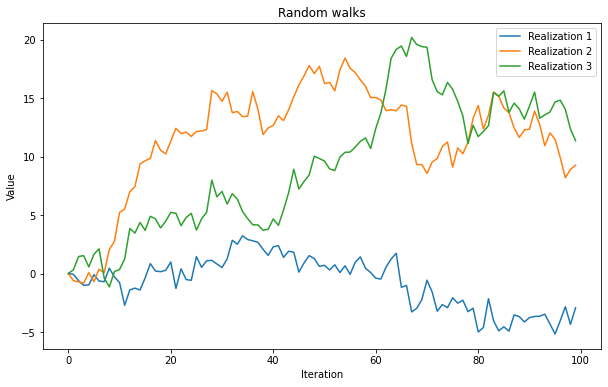

In [21]:
# Initialize an array of zeros and fill it using a for loop
N = 100 # length of one random walk
M = 3 # number of walks
x = np.zeros((N, M))
for i in range(1,N):
    r = np.random.normal(loc = 0.0, scale = 1.0, size = 3) # has shape (3,)
    x[i, :] = x[i-1, :] + r # x[i-1, :] also has shape (3,) so we can sum the arrays
    
# Plotting using matplotlib
plt.figure(figsize=(10,6))
plt.plot(x)
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Random walks')
plt.legend(('Realization 1', 'Realization 2', 'Realization 3'))
plt.show()

### 2.6 More material

* [Reshaping, concatenating and other handling of numpy arrays](https://numpy.org/doc/stable/reference/routines.array-manipulation.html)
* [More linear algebra operations](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)
* [Plotting with matplotlib](https://matplotlib.org/)

In [22]:
# Environment info
import sys
print("Python", sys.version)
print("Numpy", np.__version__)

Python 3.7.5 (default, Nov  1 2019, 02:16:32) 
[Clang 11.0.0 (clang-1100.0.33.8)]
Numpy 1.19.4
